<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220604/Ensemble_Boosting_0604(AdaBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220604/data/data02_diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  Y       442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
X = df.drop(columns=['Y'])
y = df['Y']

In [10]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.5, random_state=1)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((221, 10), (221, 10), (221,), (221,))

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
DT = DecisionTreeRegressor(max_depth=3)

In [13]:
DT.fit(X_train, y_train)
print(DT.score(X_train, y_train), DT.score(X_test, y_test))

0.6487547399526099 0.20629213571625304


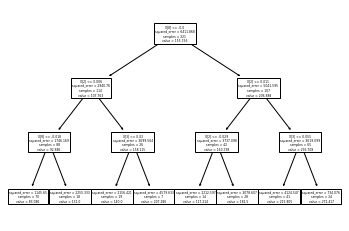

In [14]:
from sklearn import tree

tree.plot_tree(DT)

plt.show()

In [15]:
DT_2 = DecisionTreeRegressor(max_depth=3)

f = AdaBoostRegressor(DT_2, n_estimators=20, learning_rate=1,
                      random_state=0)



In [16]:
f.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=1, n_estimators=20, random_state=0)

In [17]:
f.score(X_train, y_train)

0.7392222547663521

In [18]:
f.score(X_test, y_test)

0.3160872322634558

In [19]:
## parameter tuning

from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()
parameters = {
    'base_estimator': [DT_2, None],
    'n_estimators': np.arange(2,200,2)
}

f = GridSearchCV(model, parameters, cv=3)
f.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=3),
                                            None],
                         'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198])})

In [20]:
f.best_params_
# f.best_score_
# f.best_estimator_

{'base_estimator': None, 'n_estimators': 6}

In [21]:
print(f.score(X_train, y_train), f.score(X_test, y_test))

0.6565092288120715 0.21349364380688618


In [22]:
from sklearn.model_selection import KFold, cross_val_score

model.fit(X_train, y_train)

Kf = KFold(n_splits=5, shuffle=True, random_state=100)

score = cross_val_score(model, X_test, y_test, cv=Kf, scoring='neg_mean_absolute_error')

'Ada', np.mean(score)

('Ada', -50.77553353885453)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.svm import SVR

reg_1 = RandomForestRegressor()
reg_2 = LGBMRegressor()
reg_3 = SVR()

In [24]:
model_lst = [reg_1, reg_2, reg_3]

kf = KFold(n_splits=5, shuffle=True, random_state=100)

for model in model_lst:
    score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    print(np.mean(score))

-46.65435959595959
-47.99193780404384
-64.42923959596207


In [29]:
## 교차 검증을 해보았을 때 RandomForest가 가장 작은 에러율을 보인다.

### random forest에 대하여 gridsearch를 통해 best parameter를 찾아보자


parameter = {
    'bootstrap': [True, False],
    'max_depth': [50, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [400,1200,1800]
 }

f = GridSearchCV(reg_1, parameter, n_jobs=-1)
f.fit(X_train, y_train)

KeyboardInterrupt: ignored